## Importação de Pacotes e Dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("df_athlete_events.csv")
noc_regions = pd.read_csv("nocRegions.csv") # Dataframe com relação de NOC pra Country

## Informações Iniciais e Limpeza dos dados

In [3]:
df.head(10)

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
2,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
3,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
4,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
5,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
6,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
7,17,Paavo Johannes Aaltonen,MALE,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
8,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
9,17,Paavo Johannes Aaltonen,M,32.0,175.0,64.0,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Team All-Around,Bronze


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45567 entries, 0 to 45566
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Athlete_ID  45567 non-null  int64  
 1   Name        45567 non-null  object 
 2   Sex         45567 non-null  object 
 3   Age         44594 non-null  float64
 4   Height      35547 non-null  float64
 5   Weight      34926 non-null  object 
 6   Team        45567 non-null  object 
 7   NOC         45567 non-null  object 
 8   Games       45567 non-null  object 
 9   Year        45567 non-null  int64  
 10  Season      45567 non-null  object 
 11  City        45567 non-null  object 
 12  Sport       45567 non-null  object 
 13  Event       45567 non-null  object 
 14  Medal       39804 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 5.2+ MB


 Temos 14 colunas, 4 numéricas e outras 10 como object. Entretanto, weight em teoria precisa ser uma coluna numérica. Além disso, percebe-se que as colunas Age, Height, Weight e Medal possuem valores faltantes.

In [5]:
df.isnull().sum().where(df.isnull().sum() > 0).dropna()

Age         973.0
Height    10020.0
Weight    10641.0
Medal      5763.0
dtype: float64

### Valores Numéricos

<p>Aqui observamos que existem colunas com valores NaNs, que precisamos tratar adequadamente. Em relação a Medal, interpretaremos como sem medalha. Sobre Age, Height e Weight trocaremos seus valores faltantes pela média dos valores coerentes da coluna </p>

In [6]:
df["Medal"].replace({None: "No Medal"}, inplace = True)

In [7]:
df.head()

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,No Medal
2,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
3,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
4,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze


Antes de analisarmos os valores faltantes de Age, Weight e Height, trocaremos o tipo da coluna Weight.

In [8]:
df.Weight = pd.to_numeric(df.Weight, errors='coerce')

In [9]:
df.dtypes

Athlete_ID      int64
Name           object
Sex            object
Age           float64
Height        float64
Weight        float64
Team           object
NOC            object
Games          object
Year            int64
Season         object
City           object
Sport          object
Event          object
Medal          object
dtype: object

Agora sim, podemos avaliar os valores numéricos faltantes e discrepantes 

In [10]:
df.describe()

,Athlete_ID,Age,Height,Weight,Year
count,45567.000000,44594.000000,3.554700e+04,34426.000000,45567.000000
mean,69129.286282,25.851348,9.729939e+02,73.482450,1972.391094
std,38866.485546,5.966053,3.446781e+04,14.977912,94.200678
min,4.000000,10.000000,1.320000e+02,28.000000,-2992.000000
25%,36105.500000,22.000000,1.700000e+02,63.000000,1952.000000
50%,68634.000000,25.000000,1.780000e+02,72.000000,1984.000000
75%,103181.000000,29.000000,1.850000e+02,82.000000,2002.000000
max,135563.000000,73.000000,1.976779e+06,214.000000,2016.000000


<p>   Primeiramente para a coluna Age, que representa a Idade dos esportistas. Os valores minimos e máximos são coerentes com dados históricos pesquisados, portanto o unico problema na análise seria a ausencia de alguns dados.</p>
<p>   Para a coluna Height, além dos dados faltantes, o valor máximo é incoerente com a realidade humana.</p>
<p>   Para a coluna Weight, os dados parecem coerentes, o problema também são os os dados faltantes.</p>
<p>   Para a coluna Year, possuem valores incoerentes para o numero minimo.</p>

In [11]:
alturasincoerentes = df[df["Height"] > 272].Height.values

In [12]:
AlturaMedia = df[~df['Height'].isin(df[df["Height"] > 272].Height)].Height.mean()

In [13]:
df['Height'] = df['Height'].map(lambda x: AlturaMedia if (x in alturasincoerentes) else x)

In [14]:
df.describe()

,Athlete_ID,Age,Height,Weight,Year
count,45567.000000,44594.000000,35547.000000,34426.000000,45567.000000
mean,69129.286282,25.851348,177.218534,73.482450,1972.391094
std,38866.485546,5.966053,10.862522,14.977912,94.200678
min,4.000000,10.000000,132.000000,28.000000,-2992.000000
25%,36105.500000,22.000000,170.000000,63.000000,1952.000000
50%,68634.000000,25.000000,178.000000,72.000000,1984.000000
75%,103181.000000,29.000000,184.000000,82.000000,2002.000000
max,135563.000000,73.000000,223.000000,214.000000,2016.000000


   Agora os problemas são apenas os valores faltantes, que iremos substituir pelos valores médios para idade já que são poucas, e excluiremos no caso de altura e peso, pois possuem um numero muito alto de dados faltantes.

In [15]:
df.dropna(subset = ["Height","Weight"], inplace = True)

In [16]:
df['Age'].fillna(df.Age.mean().round(), inplace = True)

In [17]:
df.isnull().sum().where(df.isnull().sum() > 0).dropna()

Series([], dtype: float64)

Para a coluna Year, usaremos os quatro primeiros caracteres da coluna Games, que indica o ano de acontecimento dos jogos.

In [18]:
print(sorted(df["Games"].unique()))

['1896 Summer', '1900 Summer', '1904 Summer', '1906 Summer', '1908 Summer', '1912 Summer', '1920 Summer', '1924 Summer', '1924 Winter', '1928 Summer', '1928 Winter', '1932 Summer', '1932 Winter', '1936 Summer', '1936 Winter', '1948 Summer', '1948 Winter', '1952 Summer', '1952 Winter', '1956 Summer', '1956 Winter', '1960 Summer', '1960 Winter', '1964 Summer', '1964 Winter', '1968 Summer', '1968 Winter', '1972 Summer', '1972 Winter', '1976 Summer', '1976 Winter', '1980 Summer', '1980 Winter', '1984 Summer', '1984 Winter', '1988 Summer', '1988 Winter', '1992 Summer', '1992 Winter', '1994 Winter', '1996 Summer', '1998 Winter', '2000 Summer', '2002 Winter', '2004 Summer', '2006 Winter', '2008 Summer', '2010 Winter', '2012 Summer', '2014 Winter', '2016 Summer']


In [19]:
df["Year"] = df["Games"].str[:4]
df["Year"] = pd.to_numeric(df["Year"])

In [20]:
df["Year"].unique()

array([1992, 2014, 1948, 1952, 1994, 2002, 2006, 1996, 2016, 2008, 2000,
       2012, 2004, 1980, 1984, 1988, 1960, 1964, 1972, 1936, 1924, 1912,
       1932, 1920, 1998, 1968, 1976, 2010, 1928, 1956, 1908, 1904, 1906,
       1900, 1896], dtype=int64)

Agora que substituimos todos os valores faltantes podemos análisar se os valores catégóricos são coerentes.

### Valores Categóricos

In [21]:
df.columns

Index(['Athlete_ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC',
       'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [22]:
df.Sex.unique()

array(['M', 'MALE', 'Vic vai te dar um socao', 'F', 'FEMALE',
       'P&D >> Comunidade'], dtype=object)

Aqui vemos que possuem valores incoerentes na coluna Sex. Substituiremos MALE por M, FEMALE por F e analisaremos as outras duas para ver como substituiremos adequadamente.


In [23]:
df.loc[df['Sex'].isin(['Vic vai te dar um socao',
       'P&D >> Comunidade'])]

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
21,30,Pepijn Aardewijn,Vic vai te dar um socao,26.0,189.0,72.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Lightweight Double Sculls,Silver
131,562,Pawe Abratkiewicz,Vic vai te dar um socao,27.0,183.0,84.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Speed Skating,Speed Skating Men's 500 metres,No Medal
227,963,Derrick Ralph Adkins,Vic vai te dar um socao,26.0,188.0,80.0,United States,USA,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Men's 400 metres Hurdles,Gold
355,1435,Janne Petteri Ahonen,Vic vai te dar um socao,28.0,184.0,66.0,Finland,FIN,2006 Winter,2006,Winter,Torino,Ski Jumping,"Ski Jumping Men's Large Hill, Team",Silver
365,1467,Mara Magdalena Aicega Amicarelli,P&D >> Comunidade,34.0,165.0,60.0,Argentina,ARG,2008 Summer,2008,Summer,Beijing,Hockey,Hockey Women's Hockey,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44982,133933,Javier Adelmar Zanetti,Vic vai te dar um socao,22.0,178.0,73.0,Argentina,ARG,1996 Summer,1996,Summer,Atlanta,Football,Football Men's Football,Silver
45021,134077,Nataliya Borisovna Zasulskaya,P&D >> Comunidade,23.0,190.0,95.0,Unified Team,EUN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Women's Basketball,Gold
45103,134294,Martina Zellner (-Seidl),P&D >> Comunidade,23.0,169.0,62.0,Germany,GER,1998 Winter,1998,Winter,Nagano,Biathlon,Biathlon Women's 4 x 7.5 kilometres Relay,Gold
45187,134531,Zhang Ping,P&D >> Comunidade,22.0,187.0,73.0,China,CHN,2004 Summer,2004,Summer,Athina,Volleyball,Volleyball Women's Volleyball,Gold


Os valores corretos podem ser vistos em Event, então criaremos uma coluna com base em Event para saber se o evento é feminimo ou masculino.

In [24]:
df["Men"] = df["Event"].str.contains("Men")
df["Mixed"] = df["Event"].str.contains("Mixed")
df["Women"] = df["Event"].str.contains("Women")

In [25]:
df[(df["Sex"] == "Vic vai te dar um socao") & ((df["Women"] ==True) | (df["Mixed"] ==True))]

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Men,Mixed,Women
959,3864,"Thomas James ""Tom"" Anderson",Vic vai te dar um socao,33.0,183.0,89.0,Australia,AUS,1972 Summer,1972,Summer,Munich,Sailing,Sailing Mixed Three Person Keelboat,Gold,False,True,False
2537,9041,Colin Kenneth Beashel,Vic vai te dar um socao,36.0,181.0,87.0,Australia,AUS,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Mixed Two Person Keelboat,Bronze,False,True,False
2920,10128,"Stephen DeLancey ""Steve"" Benjamin",Vic vai te dar um socao,28.0,175.0,59.0,United States,USA,1984 Summer,1984,Summer,Los Angeles,Sailing,Sailing Mixed Two Person Dinghy,Silver,False,True,False
3599,12095,Henrik Blakskjr,Vic vai te dar um socao,29.0,194.0,90.0,Denmark,DEN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Mixed Three Person Keelboat,Gold,False,True,False
5438,17391,"Stephen ""Steve"" Calder",Vic vai te dar um socao,26.0,204.0,96.0,Canada,CAN,1984 Summer,1984,Summer,Los Angeles,Sailing,Sailing Mixed Three Person Keelboat,Bronze,False,True,False
11710,36987,Kevin John Freeman,Vic vai te dar um socao,22.0,171.0,68.0,United States,USA,1964 Summer,1964,Summer,Tokyo,Equestrianism,"Equestrianism Mixed Three-Day Event, Team",Silver,False,True,False
14373,44785,Norbert Hahn,Vic vai te dar um socao,26.0,180.0,73.0,East Germany-1,GDR,1980 Winter,1980,Winter,Lake Placid,Luge,Luge Mixed (Men)'s Doubles,Gold,True,True,False
17732,54439,Poul Richard Hj Jensen,Vic vai te dar um socao,36.0,183.0,78.0,Denmark,DEN,1980 Summer,1980,Summer,Moskva,Sailing,Sailing Mixed Three Person Keelboat,Gold,False,True,False
25619,77058,Wolfgang Mayrhofer,Vic vai te dar um socao,22.0,181.0,71.0,Austria,AUT,1980 Summer,1980,Summer,Moskva,Sailing,Sailing Mixed One Person Dinghy,Silver,False,True,False
26112,78412,Aleksandr Remmovich Melentyev,Vic vai te dar um socao,26.0,177.0,82.0,Soviet Union,URS,1980 Summer,1980,Summer,Moskva,Shooting,"Shooting Mixed Free Pistol, 50 metres",Gold,False,True,False


In [26]:
df[(df["Sex"] == "P&D >> Comunidade") & ((df["Men"] ==True) | (df["Mixed"] ==True))]

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Men,Mixed,Women
2582,9154,Laura Bechtolsheimer (-Tomlinson),P&D >> Comunidade,27.0,169.000000,56.0,Great Britain,GBR,2012 Summer,2012,Summer,London,Equestrianism,"Equestrianism Mixed Dressage, Individual",Bronze,False,True,False
2751,9561,Tanith Jessica Louise Belbin,P&D >> Comunidade,21.0,167.000000,52.0,United States-1,USA,2006 Winter,2006,Winter,Torino,Figure Skating,Figure Skating Mixed Ice Dancing,Silver,False,True,False
7915,25713,Meryl Elizabeth Davis,P&D >> Comunidade,23.0,160.000000,49.0,United States-1,USA,2010 Winter,2010,Winter,Vancouver,Figure Skating,Figure Skating Mixed Ice Dancing,Silver,False,True,False
13717,43025,"Oksana Vladimirovna ""Pasha"" Grishchuk",P&D >> Comunidade,26.0,164.000000,50.0,Russia-1,RUS,1998 Winter,1998,Winter,Nagano,Figure Skating,Figure Skating Mixed Ice Dancing,Gold,False,True,False
16459,50501,Olena Eduardivna Hrushyna (-Honcharova-),P&D >> Comunidade,31.0,168.000000,52.0,Ukraine-1,UKR,2006 Winter,2006,Winter,Torino,Figure Skating,Figure Skating Mixed Ice Dancing,Bronze,False,True,False
19026,58265,Oksana Borisovna Kazakova,P&D >> Comunidade,22.0,158.000000,48.0,Russia-1,RUS,1998 Winter,1998,Winter,Nagano,Figure Skating,Figure Skating Mixed Pairs,Gold,False,True,False
22807,68693,Karen Lende O'Connor,P&D >> Comunidade,42.0,168.000000,55.0,United States,USA,2000 Summer,2000,Summer,Sydney,Equestrianism,"Equestrianism Mixed Three-Day Event, Team",Bronze,False,True,False
31229,94284,Yelena Vladimirovna Petushkova (-Brumel-),P&D >> Comunidade,27.0,160.000000,65.0,Soviet Union,URS,1968 Summer,1968,Summer,Mexico City,Equestrianism,"Equestrianism Mixed Dressage, Team",Silver,False,True,False
31320,94497,Zara Anne Elizabeth Phillips (-Tindall),P&D >> Comunidade,31.0,177.218534,64.0,Great Britain,GBR,2012 Summer,2012,Summer,London,Equestrianism,"Equestrianism Mixed Three-Day Event, Team",Silver,False,True,False
37275,112260,Gina Smith,P&D >> Comunidade,30.0,175.000000,66.0,Canada,CAN,1988 Summer,1988,Summer,Seoul,Equestrianism,"Equestrianism Mixed Dressage, Team",Bronze,False,True,False


Percebemos acima que quando a coluna Sex é "P&D >> Comunidade" deveria ser "F" e quando é "Vic vai te dar um socao" deveria ser "M".

In [27]:
df["Sex"] = df["Sex"].map(lambda x: "M" if (x == "MALE" or x == "Vic vai te dar um socao") else "F" if (x == "FEMALE" or x == "P&D >> Comunidade") else x)

In [28]:
df.Sex.unique()

array(['M', 'F'], dtype=object)

In [29]:
df.drop(columns=["Men", "Mixed", "Women"], inplace = True)
df.head()

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,No Medal
4,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
5,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
6,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
7,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold


Mais um problema resolvido. Vamos para as próximas colunas.
A coluna Team será desnecessária para a nossa análise, pois além de possuir dados incoerentes, não encontrei uma forma de padroniza-la de forma coerente. Mas isso não é um problema já que existe a coluna NOC, que me permite localizar os atletas por nacionalidade. Desse modo, iremos excluir tal coluna.

In [30]:
np.sort(df.Team.unique())

array(['#ForaBolsonaro', 'Afghanistan', 'Alain IV', 'Albania', 'Algeria',
       'Amateur Athletic Association', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Aphrodite', 'Argentina', 'Argentina-2',
       'Argonaut Rowing Club', 'Armenia', 'Aruba', 'Australasia',
       'Australia', 'Australia-1', 'Australia-2', 'Australia-3',
       'Austria', 'Austria-1', 'Austria-2', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Ballerina IV', 'Barbados', 'Barrenjoey', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bingo', 'Bluebottle',
       'Bonaparte', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brazil-1', 'Brazil-2', 'British Virgin Islands', 'Bulgaria',
       'Buraddoo', 'Burkina Faso', 'Burundi', 'Cameroon', 'Canada',
       'Canada-1', 'Canada-2', 'Cayman Islands',
       'Chicago Athletic Association', 'Chile', 'China', 'China-1',
       'China-2', 'China-3', 'Chinese Taipei', 'Clearwater', 'Colombia',
       'Combine', 'Congo (Brazzaville)', 'Congo (Kinshasa)

In [31]:
df.drop(columns = "Team", inplace = True)
df.head()

,Athlete_ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal
1,6,Per Knut Aaland,M,31.0,188.0,75.0,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,No Medal
4,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
5,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
6,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
7,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold


In [32]:
np.sort(df.NOC.unique())

array(['AFG', 'ALB', 'ALG', 'AND', 'ANG', 'ANT', 'ANZ', 'ARG', 'ARM',
       'ARU', 'AUS', 'AUT', 'AZE', 'BAH', 'BAR', 'BDI', 'BEL', 'BEN',
       'BER', 'BIH', 'BIZ', 'BLR', 'BOT', 'BRA', 'BRN', 'BUL', 'BUR',
       'CAN', 'CAY', 'CGO', 'CHI', 'CHN', 'CIV', 'CMR', 'COD', 'COK',
       'COL', 'CRC', 'CRO', 'CUB', 'CYP', 'CZE', 'DEN', 'DJI', 'DMA',
       'DOM', 'ECU', 'EGY', 'ERI', 'ESA', 'ESP', 'EST', 'ETH', 'EUN',
       'FIJ', 'FIN', 'FRA', 'FRG', 'FSM', 'GAB', 'GAM', 'GBR', 'GDR',
       'GEO', 'GER', 'GHA', 'GRE', 'GRN', 'GUA', 'GUI', 'GUM', 'GUY',
       'HAI', 'HKG', 'HON', 'HUN', 'INA', 'IND', 'IOA', 'IRI', 'IRL',
       'IRQ', 'ISL', 'ISR', 'ISV', 'ITA', 'IVB', 'JAM', 'JOR', 'JPN',
       'KAZ', 'KEN', 'KGZ', 'KIR', 'KOR', 'KOS', 'KSA', 'KUW', 'LAT',
       'LBA', 'LBR', 'LES', 'LIB', 'LIE', 'LTU', 'LUX', 'MAD', 'MAL',
       'MAR', 'MAS', 'MDA', 'MEX', 'MGL', 'MHL', 'MKD', 'MLT', 'MNE',
       'MON', 'MOZ', 'MRI', 'MTN', 'MYA', 'NAM', 'NCA', 'NED', 'NGR',
       'NIG', 'NOR',

In [33]:
df = df.merge(noc_regions, on="NOC")
df.rename(columns={'region': 'Country'}, inplace = True)
df.loc[df["NOC"] == "ROT","Country"] = "Refugee Olympic Team"
df.drop(columns = ["NOC","notes"], inplace = True)
df.head()

,Athlete_ID,Name,Sex,Age,Height,Weight,Games,Year,Season,City,Sport,Event,Medal,Country
0,6,Per Knut Aaland,M,31.0,188.0,75.0,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,No Medal,USA
1,84,Stephen Anthony Abas,M,26.0,165.0,55.0,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Featherweight, Freestyle",Silver,USA
2,145,Jeremy Abbott,M,28.0,175.0,70.0,2014 Winter,2014,Winter,Sochi,Figure Skating,Figure Skating Mixed Team,Bronze,USA
3,153,Monica Cecilia Abbott,F,23.0,191.0,88.0,2008 Summer,2008,Summer,Beijing,Softball,Softball Women's Softball,Silver,USA
4,165,Nia Nicole Abdallah,F,20.0,175.0,56.0,2004 Summer,2004,Summer,Athina,Taekwondo,Taekwondo Women's Featherweight,Silver,USA


Agora, analisaremos a coluna Season.

In [34]:
df.Season.unique()

array(['Winter', 'Summer', 'Ele nunca', '#ForaBolsonaro', 'Ele não'],
      dtype=object)

Como possuímos valores invalidos, podemos substituir a coluna pelos ultimos caracteres da coluna Games

In [35]:
df["Season"] = df["Games"].str[5:]
df["Season"].unique()

array(['Winter', 'Summer'], dtype=object)

Por último análisaremos a coluna Medal.

In [36]:
df["Medal"].unique()

array(['No Medal', 'Silver', 'Bronze', 'Gold', 'Nelson'], dtype=object)

In [37]:
df[df["Medal"] == "Nelson"]

,Athlete_ID,Name,Sex,Age,Height,Weight,Games,Year,Season,City,Sport,Event,Medal,Country
108,5971,Seimone Delicia Augustus,F,28.0,183.0,74.0,2012 Summer,2012,Summer,London,Basketball,Basketball Women's Basketball,Nelson,USA
247,9291,"Barbara Jane ""B. J."" Bedford (-Miller)",F,27.0,172.0,61.0,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Women's 4 x 100 metres Medley Relay,Nelson,USA
740,22274,"Tiffany Lisa Cohen (-Adams, -Lalonde)",F,18.0,175.0,63.0,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Women's 400 metres Freestyle,Nelson,USA
1643,45332,Sarah Kathryn Hammer (-Sparks),F,28.0,171.0,65.0,2012 Summer,2012,Summer,London,Cycling,Cycling Women's Omnium,Nelson,USA
1931,52060,Kyoko Ina,F,25.0,152.0,42.0,1998 Winter,1998,Winter,Nagano,Figure Skating,Figure Skating Mixed Pairs,Nelson,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32930,110842,Ann Simons,F,20.0,161.0,48.0,2000 Summer,2000,Summer,Sydney,Judo,Judo Women's Extra-Lightweight,Nelson,Belgium
33336,65376,Anastasia Vladimirovna Kuzmina (Shipulina-),F,25.0,180.0,67.0,2010 Winter,2010,Winter,Vancouver,Biathlon,Biathlon Women's 10 kilometres Pursuit,Nelson,Slovakia
33444,7874,Sonja Barjaktarovi,F,25.0,180.0,74.0,2012 Summer,2012,Summer,London,Handball,Handball Women's Handball,Nelson,Montenegro
33468,18372,Sara Lopez Mota Carmo,F,29.0,179.0,69.0,2016 Summer,2016,Summer,Rio de Janeiro,Sailing,Sailing Women's One Person Dinghy,Nelson,Portugal


Apenas pelo dataset, não conseguimos verificar o real valor das medalhas, portanto admitiremos os valores inválidos como "No Medal".

In [38]:
df.loc[df["Medal"]== 'Nelson',"Medal"] = "No Medal"
df["Medal"].unique()

array(['No Medal', 'Silver', 'Bronze', 'Gold'], dtype=object)

Como ja verificamos todas as colunas que nos interessariam, agora excluiremos as colunas que não utilizaremos para analisar.

In [39]:
df.drop(columns = ["Athlete_ID", "Games", "City", "Event"], inplace = True)

### Dataset Limpo

In [40]:
df.head(30)

,Name,Sex,Age,Height,Weight,Year,Season,Sport,Medal,Country
0,Per Knut Aaland,M,31.0,188.0,75.0,1992,Winter,Cross Country Skiing,No Medal,USA
1,Stephen Anthony Abas,M,26.0,165.0,55.0,2004,Summer,Wrestling,Silver,USA
2,Jeremy Abbott,M,28.0,175.0,70.0,2014,Winter,Figure Skating,Bronze,USA
3,Monica Cecilia Abbott,F,23.0,191.0,88.0,2008,Summer,Softball,Silver,USA
4,Nia Nicole Abdallah,F,20.0,175.0,56.0,2004,Summer,Taekwondo,Silver,USA
5,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,2000,Summer,Basketball,Gold,USA
6,Clarence John Abel,M,23.0,185.0,102.0,1924,Winter,Ice Hockey,Silver,USA
7,Michael Brent Abernathy,M,22.0,182.0,84.0,2000,Summer,Baseball,Gold,USA
8,"Edgar Allen ""Ed"" Ablowich",M,19.0,182.0,68.0,1932,Summer,Athletics,Gold,USA
9,"Benjamin Willard ""Ben"" Adams",M,22.0,188.0,78.0,1912,Summer,Athletics,Silver,USA


In [41]:
df.isnull().sum().where(df.isnull().sum() > 0).dropna()

Series([], dtype: float64)

In [42]:
df.describe()

,Age,Height,Weight,Year
count,34122.000000,34122.000000,34122.000000,34122.000000
mean,25.380810,177.388694,73.465814,1988.136745
std,5.102736,10.878743,14.968555,22.450011
min,12.000000,132.000000,28.000000,1896.000000
25%,22.000000,170.000000,63.000000,1976.000000
50%,25.000000,178.000000,72.000000,1992.000000
75%,28.000000,185.000000,82.000000,2006.000000
max,66.000000,223.000000,214.000000,2016.000000


Agora não temos nenhum valor nulo e todos os valores são coerentes. Podemos começar nossa análise.

## Análise

Focaremos a análise em perceber padrões que façam com que atletas tenham medalhas maiores. Além dos principais países que ganham medalhas.

Primeiro verificaremos os Top10 Paises.

In [43]:
df.head()

,Name,Sex,Age,Height,Weight,Year,Season,Sport,Medal,Country
0,Per Knut Aaland,M,31.0,188.0,75.0,1992,Winter,Cross Country Skiing,No Medal,USA
1,Stephen Anthony Abas,M,26.0,165.0,55.0,2004,Summer,Wrestling,Silver,USA
2,Jeremy Abbott,M,28.0,175.0,70.0,2014,Winter,Figure Skating,Bronze,USA
3,Monica Cecilia Abbott,F,23.0,191.0,88.0,2008,Summer,Softball,Silver,USA
4,Nia Nicole Abdallah,F,20.0,175.0,56.0,2004,Summer,Taekwondo,Silver,USA


In [44]:
top10countries = df[["Country"]][(df["Medal"] == "Gold") | (df["Medal"] == "Silver") | (df["Medal"] == "Bronze")].value_counts().reset_index().rename(columns = {0:"Count"}).head(10)
top10countries

,Country,Count
0,USA,4318
1,Russia,3542
2,Germany,3130
3,Australia,1174
4,Italy,1056
5,Canada,1036
6,UK,1019
7,France,976
8,China,939
9,Japan,826


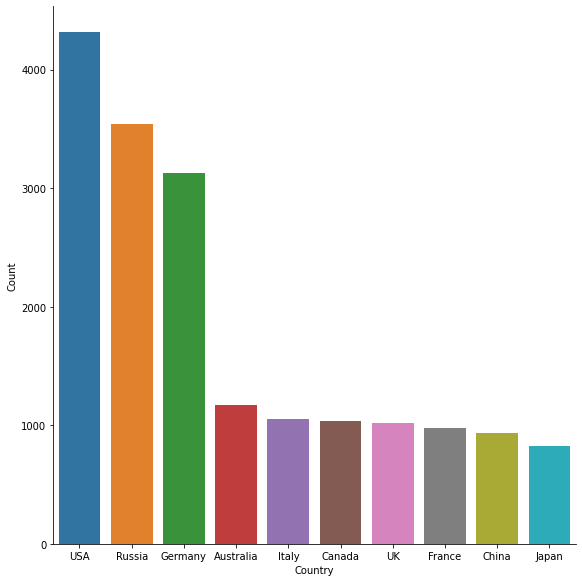

In [45]:
sns.catplot(kind = "bar", x = "Country", y="Count", data = top10countries, height=8)

Agora analisaremos os Top Medalhistas.

In [46]:
top10Athletes = df[["Name","Sport"]][(df["Medal"] == "Gold") | (df["Medal"] == "Silver") | (df["Medal"] == "Bronze")].value_counts().reset_index().rename(columns = {0:"Count"}).head(20)
top10Athletes

,Name,Sport,Count
0,"Michael Fred Phelps, II",Swimming,28
1,Larysa Semenivna Latynina (Diriy-),Gymnastics,17
2,Nikolay Yefimovich Andrianov,Gymnastics,15
3,Takashi Ono,Gymnastics,13
4,Ole Einar Bjrndalen,Biathlon,13
5,Borys Anfiyanovych Shakhlin,Gymnastics,13
6,Paavo Johannes Nurmi,Athletics,12
7,Sawao Kato,Gymnastics,12
8,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",Swimming,12
9,"Dara Grace Torres (-Hoffman, -Minas)",Swimming,12


Aí estão os maiores medalhistas da história dos esportes olímpicos.

Agora iniciaremos uma análise em relação a diferença no peso, idade, altura por esporte. Para os 5 maiores e menores esportes, analisaremos se há diferença entre os medalhistas e não medalistas em idade, peso e altura.

In [47]:
df[["Age","Height","Weight"]].describe()

,Age,Height,Weight
count,34122.000000,34122.000000,34122.000000
mean,25.380810,177.388694,73.465814
std,5.102736,10.878743,14.968555
min,12.000000,132.000000,28.000000
25%,22.000000,170.000000,63.000000
50%,25.000000,178.000000,72.000000
75%,28.000000,185.000000,82.000000
max,66.000000,223.000000,214.000000


#### Idade

In [61]:
df.groupby("Sport").mean()["Age"].sort_values(ascending = True).head(10)

Sport
Rhythmic Gymnastics          18.846154
Swimming                     21.016584
Gymnastics                   21.820828
Diving                       22.313019
Short Track Speed Skating    22.745819
Boxing                       23.362155
Ski Jumping                  23.491304
Taekwondo                    23.668790
Synchronized Swimming        23.697778
Figure Skating               23.882143
Name: Age, dtype: float64

In [62]:
df.groupby("Sport").mean()["Age"].sort_values(ascending = True).tail(10)

Sport
Lacrosse            28.000000
Skeleton            29.300000
Bobsleigh           29.382530
Beach Volleyball    29.689189
Sailing             29.915493
Shooting            30.791024
Golf                31.250000
Art Competitions    32.000000
Curling             32.242647
Equestrianism       35.170799
Name: Age, dtype: float64

#### Altura

In [60]:
df.groupby("Sport").mean()["Height"].sort_values(ascending = True).head(10)

Sport
Gymnastics                   161.945949
Diving                       165.941828
Trampolining                 166.310345
Weightlifting                167.686971
Figure Skating               168.640066
Synchronized Swimming        168.728889
Short Track Speed Skating    169.712375
Rhythmic Gymnastics          169.961538
Softball                     171.018072
Table Tennis                 171.280220
Name: Height, dtype: float64

In [59]:
df.groupby("Sport").mean()["Height"].sort_values(ascending = True).tail(10)

Sport
Tug-Of-War          180.375000
Swimming            180.824629
Bobsleigh           182.189759
Baseball            182.435416
Handball            183.321429
Rowing              184.641502
Water Polo          185.516729
Beach Volleyball    186.621622
Volleyball          187.162880
Basketball          192.257388
Name: Height, dtype: float64

É coerente que esportes como Basquete, Volei e Polo possuam uma média de altura alta, entretanto, Handball e Rowing possuirem a sexta e a quinta maior altura é interessante.

#### Peso

In [58]:
df.groupby("Sport").mean()["Weight"].sort_values(ascending = True).head(10)

Sport
Rhythmic Gymnastics          49.000000
Gymnastics                   55.864166
Synchronized Swimming        56.346667
Diving                       58.994460
Trampolining                 59.137931
Figure Skating               60.371429
Triathlon                    63.136364
Ski Jumping                  63.765217
Short Track Speed Skating    64.086957
Table Tennis                 64.576923
Name: Weight, dtype: float64

In [57]:
df.groupby("Sport").mean()["Weight"].sort_values(ascending = True).tail(10)

Sport
Ice Hockey       80.804176
Rowing           80.933424
Rugby Sevens     81.102564
Handball         81.356122
Weightlifting    81.561760
Tug-Of-War       83.000000
Water Polo       85.472119
Baseball         85.843478
Basketball       86.918970
Bobsleigh        90.003012
Name: Weight, dtype: float64

É interessante como Bobsleigh e Baseball possuem medias de peso tão altas. Já Basquete e Polo podem ser devido a altura dos atletas. Curioso também como levantamento de peso não ficou com a maior média de peso. Possivelmente, a baixa média de altura influencie, mas ainda sim é impressionante como os atletas conseguem levantar quantidades de peso muito acima do peso deles.